# KNF UseCase Trending

### Libraries

In [1]:
import pickle as p
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

### Functions

In [2]:
def readPickle(pfad, filename):
    with open(pfad + filename, 'rb') as f:
        data = p.load(f)
    print(len(data))
    return data

def writePickle(data, name):
    with open(name, 'wb') as f:
        p.dump(data, f)
        
def plotPickle(name):
    with open(name, 'rb') as f:
        data = p.load(f)
    f.close()

    xpoints = np.arange(0, 10000)

    for x in range(6):
        plt.plot(xpoints, data[x])
    plt.show()
    
def controlID(id, ta, j):
    device_id = []
    i = 0
    for i in range(j):
        device_id.append(ta[i]['number'])
        j = j+1
    return device_id

### Read Pickle Files
#### Code nur einmal ausführen

In [3]:
file = "testPickle.pkl"
with open(file, 'rb') as file:
    testdata = p.load(file)

file = "testPickle_Y.pkl"
with open(file, 'rb') as file:
    testdata_Y = p.load(file)
    
file = "metadata.pkl"
with open(file, 'rb') as file:
    metadata = p.load(file)

In [4]:
x = testdata
y = testdata_Y
m = metadata

## Code jede Pumpe einmal aufführen

In [6]:
pump_data = []
pump_dic = {"index": 0,"number":0,"defect_1": 0,"defect_2": 0, "defStrat_ls": 0, "defStrat_cs": 0, "defStrat_st": 0, "condition": 0, "pressure": 0}

for j in range(len(m)):
    v = m[j]['device_id']
    ok = True
    
    for i in range(len(pump_data)):
        if v == pump_data[i]['number']:
            ok = False
            break

    if ok:
        pump_dic = {"index": j,
                    "number": m[j]['device_id'],
                    "defect_1": m[j]['device_infos/defect 1'],
                    "defect_2": m[j]['device_infos/defect 2'], 
                    "defStrat_ls": m[j]['device_infos/defectstart ls'], 
                    "defStrat_cs": m[j]['device_infos/defectstart cs'], 
                    "defStrat_st": m[j]['device_infos/defectstart st'], 
                    "condition": m[j]['device_infos/condition'], 
                    "pressure": m[j]['device_infos/pressure [bar]']}
        
        pump_data.append(pump_dic)


### Beschreibung

#### Was ist im Array

'index': Wert welcher zeigt wo die Messdaten und Metadaten dieser Pumpe beginnen

'number': device_id der Pumpe

'defect_1': erster Defekt der Pumpe

'defect_2': zweiter Defekt der Pumpe

'defStrat_ls': -

'defStrat_cs': -

'defStrat_st': -

'condition': Betriebsart

'pressure': Druck beim Test

#### Was bringt das?
Anhand dieser Werte erhält man schneller einen Eindruch über die Pumpen. Zudem kann man auch sagen wann die Messdaten jeder einzelnen Pumpe beginnen. Durch die Verknüpfung des Indexes und der Metadaten kann man dadurch auch schneller nach der Betriebsart oder den Defekten filtern.

## Filter

In [7]:
def pump_filter(kriterium, daten, index):
    j = 0
    pump_filter_result = []
    for j in range(len(daten)):
        if daten[j][str(index)] == str(kriterium):
            pump_filter_result.append(j)
            j = j+1
        else:
            j= j+1
    return pump_filter_result

In [86]:
pump_filter_res = pump_filter(31503, pump_data, 'number')

In [87]:
pump_filter_res

[]

In [9]:
j = 0
for j in range(len(pump_filter_res)):
    print(pump_filter_res[j],pump_data[pump_filter_res[j]]['defect_1'],pump_data[pump_filter_res[j]]['number'])

10 leakage 31435
33 leakage 31458
50 leakage 31490
51 leakage 31491
52 leakage 31492
78 leakage 31936


## In allen Daten suchen

In [10]:
def pump_search(nr, metadata, kriterium):
    j = 0
    pump_search_result = []
    for j in range(len(metadata)):
        if metadata[j][kriterium] == nr:
            pump_search_result.append(j)
            j = j+1
        else:
            j = j+1
    min_index = min(pump_search_result)
    max_index = max(pump_search_result)
    return min_index, max_index

### Darstellung Filter

#### Defekte Top 3

In [93]:
## -> 1.
def_1_brushes = pump_filter('brushes', pump_data, 'defect_1')
## -> 2.
def_1_bearing = pump_filter('bearing', pump_data, 'defect_1')
## -> 3.
def_1_diaphragm = pump_filter('diaphragm', pump_data, 'defect_1')

def_1_leakage = pump_filter('leakage', pump_data, 'defect_1')

def_1_valve = pump_filter('valve', pump_data, 'defect_1')

n_31503 = pump_search(31503, m, 'device_id')

bearing = pump_filter('diaphragm', pump_data, 'defect_1')
print(len(def_1_bearing),
      len(def_1_leakage),
      len(def_1_diaphragm),
      len(def_1_valve),
      len(def_1_brushes),(81 - len(def_1_bearing)-len(def_1_leakage)-len(def_1_diaphragm)-len(def_1_brushes)),
      n_31503,(n_31503[1]-n_31503[0])/93)

27 6 8 0 35 5 (30411, 31433) 10.989247311827956


#### Pumpen leakage

10 leakage 31435

33 leakage 31458

50 leakage 31490

51 leakage 31491

52 leakage 31492

78 leakage 31936

In [25]:
pump_leakage = [[[31435],[pump_search(31435, m, 'device_id')[0]],[pump_search(31435, m, 'device_id')[1]],[pump_search(31435, m, 'device_id')[1]-pump_search(31435, m, 'device_id')[0]]],
[[31458],[pump_search(31458, m, 'device_id')[0]],[pump_search(31458, m, 'device_id')[1]],[pump_search(31458, m, 'device_id')[1]-pump_search(31458, m, 'device_id')[0]]],
[[31490],[pump_search(31490, m, 'device_id')[0]],[pump_search(31490, m, 'device_id')[1]],[pump_search(31490, m, 'device_id')[1]-pump_search(31490, m, 'device_id')[0]]],
[[31491],[pump_search(31491, m, 'device_id')[0]],[pump_search(31491, m, 'device_id')[1]],[pump_search(31491, m, 'device_id')[1]-pump_search(31491, m, 'device_id')[0]]],
[[31492],[pump_search(31492, m, 'device_id')[0]],[pump_search(31492, m, 'device_id')[1]],[pump_search(31492, m, 'device_id')[1]-pump_search(31492, m, 'device_id')[0]]],
[[31936],[pump_search(31936, m, 'device_id')[0]],[pump_search(31936, m, 'device_id')[1]],[pump_search(31936, m, 'device_id')[1]-pump_search(31936, m, 'device_id')[0]]]]


In [39]:
m_31435 = m[pump_leakage[0][1][0]:pump_leakage[0][2][0]]
m_31458 = m[pump_leakage[1][1][0]:pump_leakage[1][2][0]]
m_31490 = m [pump_leakage[2][1][0]:pump_leakage[2][2][0]]
m_31491 = m [pump_leakage[3][1][0]:pump_leakage[3][2][0]]
m_31492 = m [pump_leakage[4][1][0]:pump_leakage[4][2][0]]
m_31936 = m [pump_leakage[5][1][0]:pump_leakage[5][2][0]]

In [40]:
x_31435 = x[pump_leakage[0][1][0]:pump_leakage[0][2][0]]
x_31458 = x[pump_leakage[1][1][0]:pump_leakage[1][2][0]]
x_31490 = x[pump_leakage[2][1][0]:pump_leakage[2][2][0]]
x_31491 = x[pump_leakage[3][1][0]:pump_leakage[3][2][0]]
x_31492 = x[pump_leakage[4][1][0]:pump_leakage[4][2][0]]
x_31936 = x[pump_leakage[5][1][0]:pump_leakage[5][2][0]]

In [55]:
j = 0
t_m_31458 = []
for j in range(len(m_31458)):
    t_m_31458.append(m_31458[j]['window_start_time [h]'])
    j = j+1

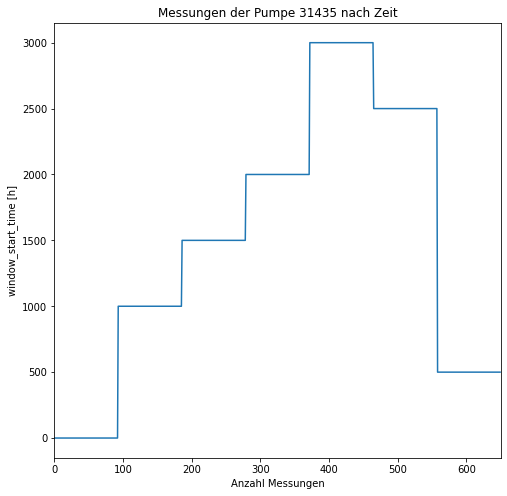

In [60]:
plt.figure(figsize=(8,8))
plt.title('Messungen der Pumpe 31435 nach Zeit')
plt.ylabel('window_start_time [h]')
plt.xlabel('Anzahl Messungen')
plt.xlim(0,len(t_m_31435))
plt.plot(t_m_31435)
plt.show()

#### Darstellung der Messdaten der 

In [72]:
def_1_leakage[0]

10

In [64]:
j = 0
data = def_1_leakage
values = [[[],[],[],[],[],[]]]
for j in range(len(data)):
    i = pump_leakage[j][1][0]
    for i in range(int(pump_leakage[j][2][0])):
        values[j][0].append(x[i][0].mean())
        values[j][1].append(x[i][1].mean())
        values[j][2].append(x[i][2].mean())
        values[j][3].append(x[i][3].mean())
        values[j][4].append(x[i][4].mean())
        values[j][5].append(x[i][5].mean())
        i = i+1
    j = j+1
    values.append([[],[],[],[],[],[]])

In [65]:
len(values[5][1])

40082

In [66]:
j = 0
for j in range(len(values[5][1])):
    data = values[5][1]
    i = 0
    for i in range(len(values)-1):
        if values[5][j][] == values[4][1]:
            
        

SyntaxError: invalid syntax (3337116130.py, line 6)

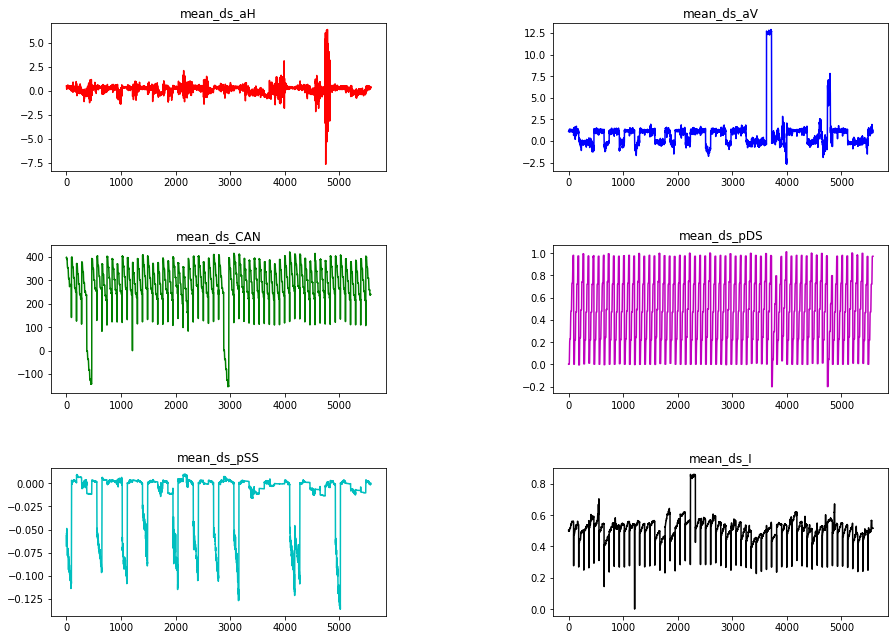

In [71]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.5,hspace=0.5)

'mean_ds_aH'
plt.subplot(421)
plt.title('mean_ds_aH')
plt.plot(values[0][0], 'r')
#plt.plot(values[1][0], 'b')
#plt.plot(values[2][0], 'g')
#plt.plot(values[3][0], 'm')
#plt.plot(values[4][0], 'c')
#plt.plot(values[5][0], 'k')

'mean_ds_aV'
plt.subplot(422)
plt.title('mean_ds_aV')
plt.plot(values[0][1], 'b') 
#plt.plot(values[1][1], 'b') 
#plt.plot(values[2][1], 'g') 
#plt.plot(values[3][1], 'm') 
#plt.plot(values[4][1], 'c') 
#plt.plot(values[5][1], 'k') 

'mean_ds_CAN'
plt.subplot(423)
plt.title('mean_ds_CAN')
plt.plot(values[0][2], 'g')
#plt.plot(values[1][2], 'b')
#plt.plot(values[2][2], 'g')
#plt.plot(values[3][2], 'm')
#plt.plot(values[4][2], 'c')
#plt.plot(values[5][2], 'k')

'mean_ds_pDS'
plt.subplot(424)
plt.title('mean_ds_pDS')
plt.plot(values[0][3], 'm')
#plt.plot(values[1][3], 'g')
#plt.plot(values[2][3], 'b')
#plt.plot(values[3][3], 'm')
#plt.plot(values[4][3], 'c')
#plt.plot(values[5][3], 'k')

'mean_ds_pSS'
plt.subplot(425)
plt.title('mean_ds_pSS')
plt.plot(values[0][4], 'c')
#plt.plot(values[1][4], 'g')
#plt.plot(values[2][4], 'b')
#plt.plot(values[3][4], 'm')
#plt.plot(values[4][4], 'c')
#plt.plot(values[5][4], 'k')

'mean_ds_I'
plt.subplot(426)
plt.title('mean_ds_I')
plt.plot(values[0][5], 'k')
#plt.plot(values[1][5], 'g')
#plt.plot(values[2][5], 'b')
#plt.plot(values[3][5], 'm')
#plt.plot(values[4][5], 'c')
#plt.plot(values[5][5], 'k')

'error'
plt.subplot(427)
plt.title('error')
plt.plot(y[0:])

plt.show()

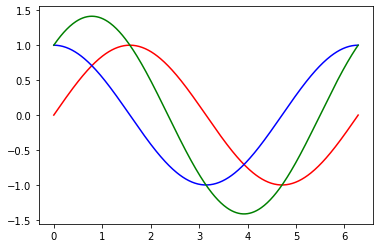

In [20]:
from numpy import *
import math
import matplotlib.pyplot as plt

t = linspace(0, 2*math.pi, 400)
a = sin(t)
b = cos(t)
c = a + b

plt.plot(t, a, 'r') # plotting t, a separately 
plt.plot(t, b, 'b') # plotting t, b separately 
plt.plot(t, c, 'g') # plotting t, c separately 
plt.show()

## Plot-Justin

In [31]:
y_data = y
metadata = m
x_data = x
DeviceId    = 31430
Sensor      = "Beschleunigung_Horizontal_58" #Select from: Beschleunigung_Horizontal_58, Beschleunigung_Vertikal_60, CAN_Flow, Druck_DS_P2, Druck_SS_P1, Strom

SensorTypes = {
    "Beschleunigung_Horizontal_58": 0,
    "Beschleunigung_Vertikal_60":   1,
    "CAN_Flow":                     2,
    "Druck_DS_P2":                  3,
    "Druck_SS_P1":                  4,
    "Strom":                        5
    }

Measurements = {}
Id = 0
#Write Start / End Id's to Dictionary for futre lookup
for Id in range(len(metadata)):
    if (metadata[Id]["trigger_time"])[:10] != (metadata[Id-1]["trigger_time"])[:10]:                 
        DeviceIdTmp = (metadata[Id]["device_id"])
        ElapsedTime = (metadata[Id]["elapsed_time_h"])

        if DeviceIdTmp not in Measurements:
            Measurements[DeviceIdTmp] = {}             
                                                                 
        Measurements[DeviceIdTmp][ElapsedTime] = {                                                             
                                "IdStart"     : Id,
                                "IdEnd"       : Id+92}
    else:
        continue
#Dictionary Measurements: {DeviceID: {ElapsedTime: {IdStart: IdStart, IdEnd: IdEnd}}}

#get Number of Total Measurements 
NumberOfMeasurements = (len(Measurements[DeviceId]))

#extract Data&Plot from each Measurement
for n in range(NumberOfMeasurements):
    ElapsedTime = n * 500
    IdStart = Measurements[DeviceId][ElapsedTime]["IdStart"]
    IdEnd   = Measurements[DeviceId][ElapsedTime]["IdEnd"] 

    x = range(0,93,1)
    y = []
    for IdStart in range(IdStart,IdEnd+1):
        y.append(np.mean(x_data[IdStart][SensorTypes[Sensor]]))
    plt.plot(x, y, label=str(ElapsedTime))

#Setting Metadata for Plot & Plotting
plt.xlabel('Time')
plt.ylabel(Sensor)
plt.legend()
plt.title("Graph for Sensor: "+str(DeviceId))
plt.grid()
plt.show()

IndexError: range object index out of range